In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [146]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses_df)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

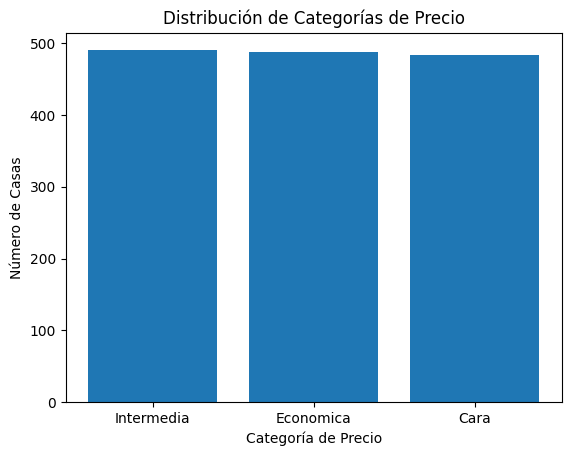

In [148]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [149]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [150]:
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_columns),
    ('standard_scaler',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [151]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(30, 20)))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), verbose=True))])

In [152]:
target = houses_df.pop('Precio_Categoria')
data = houses_df.drop(['Id', 'SalePrice'], axis=1)

In [153]:
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [154]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.08167932
Iteration 2, loss = 0.95591465
Iteration 3, loss = 0.84683198
Iteration 4, loss = 0.75213822
Iteration 5, loss = 0.67059347
Iteration 6, loss = 0.60223975
Iteration 7, loss = 0.54168873
Iteration 8, loss = 0.49392448
Iteration 9, loss = 0.45402391
Iteration 10, loss = 0.42188738
Iteration 11, loss = 0.39368715
Iteration 12, loss = 0.37122601
Iteration 13, loss = 0.35339507
Iteration 14, loss = 0.33783116
Iteration 15, loss = 0.32119295
Iteration 16, loss = 0.31346664
Iteration 17, loss = 0.30187104
Iteration 18, loss = 0.29173452
Iteration 19, loss = 0.27931929
Iteration 20, loss = 0.27283160
Iteration 21, loss = 0.26380385
Iteration 22, loss = 0.25335470
Iteration 23, loss = 0.24983827
Iteration 24, loss = 0.24259095
Iteration 25, loss = 0.23641361
Iteration 26, loss = 0.22876049
Iteration 27, loss = 0.22100761
Iteration 28, loss = 0.21381864
Iteration 29, loss = 0.20904980
Iteration 30, loss = 0.20767871
Iteration 31, loss = 0.19961801
Iteration 32, los

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), verbose=True))])

In [155]:
pred = modelo.predict(data_test)

In [156]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[139   0  21]
 [  0 136  17]
 [ 15  15  95]]
Accuracy:  0.8447488584474886
Precision:  0.8447488584474886
recall:  0.8447488584474886


In [157]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=()))

modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               verbose=True))])

In [158]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 1.28313190
Iteration 2, loss = 1.17687029
Iteration 3, loss = 1.08754285
Iteration 4, loss = 1.01174717
Iteration 5, loss = 0.94576581
Iteration 6, loss = 0.89018155
Iteration 7, loss = 0.84374897
Iteration 8, loss = 0.80304287
Iteration 9, loss = 0.76856600
Iteration 10, loss = 0.73767855
Iteration 11, loss = 0.71019738
Iteration 12, loss = 0.68691145
Iteration 13, loss = 0.66512329
Iteration 14, loss = 0.64642873
Iteration 15, loss = 0.62915318
Iteration 16, loss = 0.61410968
Iteration 17, loss = 0.60011233
Iteration 18, loss = 0.58731439
Iteration 19, loss = 0.57519839
Iteration 20, loss = 0.56449219
Iteration 21, loss = 0.55414685
Iteration 22, loss = 0.54414335
Iteration 23, loss = 0.53516515
Iteration 24, loss = 0.52677949
Iteration 25, loss = 0.51922900
Iteration 26, loss = 0.51193070
Iteration 27, loss = 0.50549621
Iteration 28, loss = 0.49877705
Iteration 29, loss = 0.49294749
Iteration 30, loss = 0.48735343
Iteration 31, loss = 0.48166639
Iteration 32, los

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               verbose=True))])

In [159]:
pred1 = modelo1.predict(data_test)

In [160]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[133   1  26]
 [  0 130  23]
 [ 14  14  97]]
Accuracy:  0.821917808219178
Precision:  0.821917808219178
recall:  0.821917808219178


## Obteniendo la variable respuesta SalePrice

In [161]:
y = houses_df.pop("SalePrice")

print(y)
print(houses_df.head())

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...      

In [162]:
X = houses_df #El resto de los datos
random.seed(123)

In [163]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [164]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 550 to 630
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1021 non-null   int64  
 1   MSSubClass     1021 non-null   int64  
 2   MSZoning       1021 non-null   object 
 3   LotFrontage    838 non-null    float64
 4   LotArea        1021 non-null   int64  
 5   Street         1021 non-null   object 
 6   Alley          62 non-null     object 
 7   LotShape       1021 non-null   object 
 8   LandContour    1021 non-null   object 
 9   Utilities      1021 non-null   object 
 10  LotConfig      1021 non-null   object 
 11  LandSlope      1021 non-null   object 
 12  Neighborhood   1021 non-null   object 
 13  Condition1     1021 non-null   object 
 14  Condition2     1021 non-null   object 
 15  BldgType       1021 non-null   object 
 16  HouseStyle     1021 non-null   object 
 17  OverallQual    1021 non-null   int64  
 18  OverallCond 

In [165]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 689 to 122
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             438 non-null    int64  
 1   MSSubClass     438 non-null    int64  
 2   MSZoning       438 non-null    object 
 3   LotFrontage    363 non-null    float64
 4   LotArea        438 non-null    int64  
 5   Street         438 non-null    object 
 6   Alley          29 non-null     object 
 7   LotShape       438 non-null    object 
 8   LandContour    438 non-null    object 
 9   Utilities      438 non-null    object 
 10  LotConfig      438 non-null    object 
 11  LandSlope      438 non-null    object 
 12  Neighborhood   438 non-null    object 
 13  Condition1     438 non-null    object 
 14  Condition2     438 non-null    object 
 15  BldgType       438 non-null    object 
 16  HouseStyle     438 non-null    object 
 17  OverallQual    438 non-null    int64  
 18  OverallCond  

In [166]:
model = make_pipeline(preprocesador, MLPRegressor(activation="relu", solver='sgd', max_iter=500, verbose=True, hidden_layer_sizes=(50, 30, 20)))

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 30, 20), max_iter=500,
                              solver='sgd', verbose=True))])

In [167]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Ajustar y transformar la variable objetivo
target_train_encoded = le.fit_transform(target_train)

# Ajustar el modelo
model.fit(data_train, target_train_encoded)

Iteration 1, loss = 0.56916661


Iteration 2, loss = 0.43679103
Iteration 3, loss = 0.35407608
Iteration 4, loss = 0.33042448
Iteration 5, loss = 0.31169480
Iteration 6, loss = 0.28784821
Iteration 7, loss = 0.26918441
Iteration 8, loss = 0.25762480
Iteration 9, loss = 0.24826345
Iteration 10, loss = 0.24063205
Iteration 11, loss = 0.23451275
Iteration 12, loss = 0.22948990
Iteration 13, loss = 0.22454543
Iteration 14, loss = 0.22021665
Iteration 15, loss = 0.21646271
Iteration 16, loss = 0.21280453
Iteration 17, loss = 0.20964319
Iteration 18, loss = 0.20681002
Iteration 19, loss = 0.20404981
Iteration 20, loss = 0.20139299
Iteration 21, loss = 0.19907663
Iteration 22, loss = 0.19668338
Iteration 23, loss = 0.19448616
Iteration 24, loss = 0.19267401
Iteration 25, loss = 0.19099547
Iteration 26, loss = 0.18864681
Iteration 27, loss = 0.18662538
Iteration 28, loss = 0.18506725
Iteration 29, loss = 0.18337715
Iteration 30, loss = 0.18172861
Iteration 31, loss = 0.18050836
Iteration 32, loss = 0.17930093
Iteration 33, l

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 30, 20), max_iter=500,
                              solver='sgd', verbose=True))])

In [168]:
pred1 = modelo.predict(data_test)

In [169]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[139   0  21]
 [  0 136  17]
 [ 15  15  95]]
Accuracy:  0.8447488584474886
Precision:  0.8447488584474886
recall:  0.8447488584474886


# Modelo 2 SalePrice

In [170]:
model1 = make_pipeline(preprocesador, MLPRegressor(activation="tanh", solver='adam', max_iter=1000, verbose=True, hidden_layer_sizes=(20,)))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='tanh', hidden_layer_sizes=(20,),
                              max_iter=1000, verbose=True))])

In [171]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Ajustar y transformar la variable objetivo
target_train_encoded = le.fit_transform(target_train)

# Ajustar el modelo
model1.fit(data_train, target_train_encoded)

Iteration 1, loss = 0.53858913
Iteration 2, loss = 0.35784209
Iteration 3, loss = 0.30719484
Iteration 4, loss = 0.28207839
Iteration 5, loss = 0.25220360
Iteration 6, loss = 0.24003771
Iteration 7, loss = 0.22729257
Iteration 8, loss = 0.21497222
Iteration 9, loss = 0.20867744
Iteration 10, loss = 0.20067432
Iteration 11, loss = 0.19522706
Iteration 12, loss = 0.19014769
Iteration 13, loss = 0.18469925
Iteration 14, loss = 0.18135396
Iteration 15, loss = 0.17715762
Iteration 16, loss = 0.17322660
Iteration 17, loss = 0.16905517
Iteration 18, loss = 0.16689460
Iteration 19, loss = 0.16230902
Iteration 20, loss = 0.16052755
Iteration 21, loss = 0.15751572
Iteration 22, loss = 0.15483656
Iteration 23, loss = 0.15176342
Iteration 24, loss = 0.14944619
Iteration 25, loss = 0.14707642
Iteration 26, loss = 0.14425040
Iteration 27, loss = 0.14218885
Iteration 28, loss = 0.14140894
Iteration 29, loss = 0.13779404
Iteration 30, loss = 0.14018741
Iteration 31, loss = 0.13420350
Iteration 32, los

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='tanh', hidden_layer_sizes=(20,),
                              max_iter=1000, verbose=True))])

In [172]:
pred2 = modelo.predict(data_test)

In [173]:
cm = confusion_matrix(target_test,pred2)
accuracy=accuracy_score(target_test,pred2)
precision =precision_score(target_test,pred2,average='micro')
recall =  recall_score(target_test,pred2,average='micro')
f1 = f1_score(target_test,pred2,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[139   0  21]
 [  0 136  17]
 [ 15  15  95]]
Accuracy:  0.8447488584474886
Precision:  0.8447488584474886
recall:  0.8447488584474886
